In [1]:
print("hi")

hi


In [11]:
#importing necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib import rcParams
rcParams['figure.figsize']=(12,5)
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
pd.set_option('display.max_columns',None)

from collections import Counter
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score , confusion_matrix , classification_report,roc_auc_score , roc_curve
from sklearn.model_selection import StratifiedKFold , cross_val_score
from sklearn.model_selection import GridSearchCV

In [28]:
#importing the data
data = pd.read_excel('Credit_Risk_PD_Model_Dataset.xlsx')
data.head()

,Industry,CASH_AND_CASH_EQUIVALENTS_floored1,COST_OF_GOODS_SOLD_1,CURRENT_ASSETS_1,CURRENT_LIABILITIES_1,DEPRECIATION_1,EBITDA_1,FIXED_AND_NON_CURRENT_ASSETS_1,GROSS_PROFIT_1,INTEREST_EXPENSE_1,LONG_TERM_DEBT_1,NET_FIXED_ASSETS_1,NET_INCOME_1,NET_INTANGIBLES_1,NET_TRADE_RECV_1,NON_CURRENT_LIABILITIES_1,RETAINED_EARNINGS_1,TOTAL_ASSETS_1,TOTAL_DEBT_1,TOTAL_INVENTORY_1,TURNOVER_1,WORKING_CAPITAL_1,Debt_to_TNW_1,Equity_to_Liability_1,Equity_to_Assets_1,Long_Term_Debt_to_Equity_1,NetFixedAssets_to_TotalDebt_1,Total_Liab_to_Total_Assets_1,EBITDA_to_total_Debt_1,EBITDA_to_Interest_1,EBITDA_to_curr_liab_1,Cash_to_Total_assets_1,Current_Ratio_1,Liquidity_Ratio_1,Curr_to_Total_Assets_1,Gross_Margin_perc_1,Net_Income_Margin_1,Total_Liab_to_Total_Assets_2_1,Default
0,Wholesale,323773,NaN,476381,516192,78247.0,357842,1953656.0,2527734,59291.0,1101146.0,1953654.0,150315,1,121478.0,1101146.0,812561,2430037,1360855.0,NaN,2527734,-39811,1.6745,0.5025,0.3344,1.3549,1.4356,0.6656,0.2630,6.0353,0.6932,0.1332,0.9229,0.8626,0.1960,NaN,5.9466,-0.0501,0
1,EduArtsHealthSocial,18593,11753.0,21913,257405,6988.0,42274,668688.0,124057,6456.0,NaN,609921.0,28829,58767,NaN,NaN,433195,690600,255496.0,NaN,135810,-235493,0.6824,1.6829,0.6273,NaN,2.3872,0.3727,0.1655,6.5479,0.1642,0.0269,0.0851,NaN,0.0317,91.3457,21.2275,-0.0472,0
2,Retail,202720,3420276.0,665190,373352,76899.0,406223,542187.0,1577802,11742.0,205530.0,520062.0,272950,22124,71143.0,282894.0,551127,1207376,337678.0,318856.0,4998079,291837,0.6383,0.8398,0.4565,0.3729,1.5401,0.5435,1.2030,34.5947,1.0880,0.1679,1.7817,0.7335,0.5509,31.5682,5.4611,-0.3119,1
3,Agriculture - Other,87515,7905311.0,1820195,2153519,702651.0,675750,7409750.0,3242324,88218.0,2684192.0,7409681.0,-115120,0,495837.0,6239035.0,837370,9229945,3524366.0,539592.0,11147635,-333324,4.2087,0.0998,0.0907,3.2054,2.1024,0.9093,0.1917,7.6600,0.3138,0.0095,0.8452,0.2709,0.1972,29.0853,-1.0327,-0.0209,0
4,EduArtsHealthSocial,272938,237933.0,381958,681622,NaN,-515748,7395426.0,540762,179654.0,3418577.0,7395426.0,-695403,0,84294.0,7937407.0,-855472,7777384,3418577.0,NaN,778696,-299664,-4.0618,-0.0976,-0.1082,-4.0618,2.1633,1.1082,-0.1509,-2.8708,-0.7566,0.0351,0.5604,0.5241,0.0491,69.4446,-89.3035,-0.0241,0


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573 entries, 0 to 572
Data columns (total 39 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Industry                            573 non-null    object 
 1   CASH_AND_CASH_EQUIVALENTS_floored1  573 non-null    int64  
 2   COST_OF_GOODS_SOLD_1                518 non-null    float64
 3   CURRENT_ASSETS_1                    573 non-null    int64  
 4   CURRENT_LIABILITIES_1               573 non-null    int64  
 5   DEPRECIATION_1                      534 non-null    float64
 6   EBITDA_1                            573 non-null    int64  
 7   FIXED_AND_NON_CURRENT_ASSETS_1      561 non-null    float64
 8   GROSS_PROFIT_1                      573 non-null    int64  
 9   INTEREST_EXPENSE_1                  480 non-null    float64
 10  LONG_TERM_DEBT_1                    359 non-null    float64
 11  NET_FIXED_ASSETS_1                  555 non-n

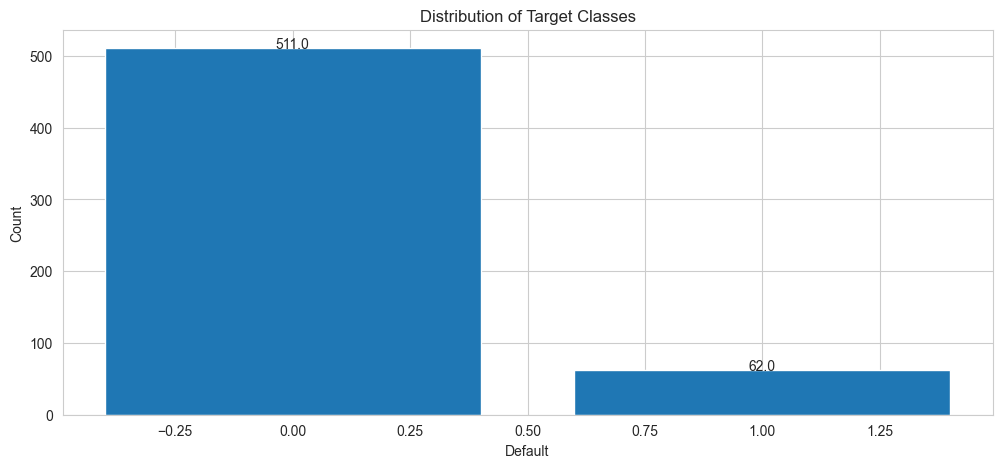

In [34]:
#checking for the distribution(count) of target classes
data['Default'] = data['Default'].astype('int')
class_counts = data['Default'].value_counts().sort_index()

plt.bar(class_counts.index, class_counts.values)
plt.xlabel('Default')
plt.ylabel('Count')
plt.title('Distribution of Target Classes')

# Annotate bars with counts
for x, y in zip(class_counts.index, class_counts.values):
    plt.text(x, y + 0.01, '{:.1f}'.format(y), ha='center')

plt.savefig("graph/Distribution_of_Target_Classes.png")

In [33]:
#checking for missing values in the data
round(data.isna().sum()/len(data)*100,2).sort_values(ascending=False)

Long_Term_Debt_to_Equity_1            37.35
LONG_TERM_DEBT_1                      37.35
NON_CURRENT_LIABILITIES_1             21.64
Liquidity_Ratio_1                     17.10
NET_TRADE_RECV_1                      17.10
INTEREST_EXPENSE_1                    16.23
EBITDA_to_Interest_1                  16.23
TOTAL_INVENTORY_1                     16.06
NetFixedAssets_to_TotalDebt_1         10.12
Gross_Margin_perc_1                    9.60
COST_OF_GOODS_SOLD_1                   9.60
TOTAL_DEBT_1                           8.03
EBITDA_to_total_Debt_1                 8.03
Debt_to_TNW_1                          8.03
DEPRECIATION_1                         6.81
NET_FIXED_ASSETS_1                     3.14
FIXED_AND_NON_CURRENT_ASSETS_1         2.09
Total_Liab_to_Total_Assets_2_1         1.92
Curr_to_Total_Assets_1                 0.00
Current_Ratio_1                        0.00
Net_Income_Margin_1                    0.00
Cash_to_Total_assets_1                 0.00
EBITDA_to_curr_liab_1           

In [35]:
#dropping missing values
data.dropna(axis=1,thresh=round(len(data)-len(data)/100*25),inplace=True)

In [36]:
#checking for the distribution of independent variables
data.describe().apply(lambda s : s.apply('{0:.5f}'.format))

,CASH_AND_CASH_EQUIVALENTS_floored1,COST_OF_GOODS_SOLD_1,CURRENT_ASSETS_1,CURRENT_LIABILITIES_1,DEPRECIATION_1,EBITDA_1,FIXED_AND_NON_CURRENT_ASSETS_1,GROSS_PROFIT_1,INTEREST_EXPENSE_1,NET_FIXED_ASSETS_1,NET_INCOME_1,NET_INTANGIBLES_1,NET_TRADE_RECV_1,NON_CURRENT_LIABILITIES_1,RETAINED_EARNINGS_1,TOTAL_ASSETS_1,TOTAL_DEBT_1,TOTAL_INVENTORY_1,TURNOVER_1,WORKING_CAPITAL_1,Debt_to_TNW_1,Equity_to_Liability_1,Equity_to_Assets_1,NetFixedAssets_to_TotalDebt_1,Total_Liab_to_Total_Assets_1,EBITDA_to_total_Debt_1,EBITDA_to_Interest_1,EBITDA_to_curr_liab_1,Cash_to_Total_assets_1,Current_Ratio_1,Liquidity_Ratio_1,Curr_to_Total_Assets_1,Gross_Margin_perc_1,Net_Income_Margin_1,Total_Liab_to_Total_Assets_2_1,Default
count,573.00000,518.00000,573.00000,573.00000,534.00000,573.00000,561.00000,573.00000,480.00000,555.00000,573.00000,573.00000,475.00000,449.00000,573.00000,573.00000,527.00000,481.00000,573.00000,573.00000,527.00000,573.00000,573.00000,515.00000,573.00000,527.00000,480.00000,573.00000,573.00000,573.00000,475.00000,573.00000,518.00000,573.00000,562.00000,573.00000
mean,260737.46422,2418543.23359,1882030.51832,1519872.27051,95440.10300,354311.38220,1912062.53654,1338839.79930,37752.21875,1577285.54054,200282.65271,77810.80977,948929.48000,946893.97550,1098391.24956,3754049.83421,1054720.06072,494918.04990,3524900.16405,362158.23909,1.71891,1.48373,0.41628,3.09437,0.58372,1.56333,164.78119,0.64531,0.10153,1.70153,0.90007,0.47859,43.99999,8.27615,-0.07344,0.10820
std,821575.22736,2862968.43545,3882481.64782,3559609.21764,155056.63976,852420.84859,3196332.90251,1624553.54597,59755.10173,2705555.87478,505163.19864,542222.73294,3147155.69300,1857338.14416,2243664.19851,5029047.97018,1785106.14049,697126.24046,3754045.76815,1324762.92532,7.39441,2.48059,0.29911,6.74730,0.29918,5.03503,774.91878,1.12734,0.15472,1.96790,1.04293,0.34451,22.92265,24.89123,0.20666,0.31091
min,-644364.00000,5116.00000,1936.00000,228.00000,271.00000,-7324453.00000,792.00000,-313885.00000,1.00000,792.00000,-3524806.00000,0.00000,37.00000,1637.00000,-6832620.00000,124669.00000,2149.00000,1244.00000,29332.00000,-4156248.00000,-24.36330,-0.54410,-1.19340,0.00380,0.04280,-6.01020,-211.97270,-1.72840,0.00000,0.02000,0.00750,0.00400,1.81380,-192.99510,-0.74580,0.00000
25%,790.00000,315268.00000,236199.00000,253171.00000,14941.00000,73034.00000,271800.00000,336650.00000,8421.00000,213013.00000,17414.00000,0.00000,23299.00000,118346.00000,184714.00000,1079525.00000,214377.00000,38496.00000,597847.00000,-132957.00000,0.19200,0.30590,0.23420,0.78130,0.37380,0.11400,3.59650,0.12090,0.00080,0.66430,0.16450,0.14750,25.50270,1.51350,-0.12857,0.00000
50%,49605.00000,1024016.00000,770200.00000,706407.00000,45219.00000,189612.00000,782718.00000,718388.00000,17734.00000,757007.00000,108816.00000,0.00000,154097.00000,355382.00000,588908.00000,2218853.00000,503951.00000,218170.00000,1656742.00000,113480.00000,0.58750,0.72710,0.42100,1.61420,0.57900,0.39040,9.20670,0.31380,0.02940,1.16600,0.66570,0.39100,37.89770,5.68280,-0.04835,0.00000
75%,284872.00000,4245791.75000,2180921.00000,1656906.00000,111614.25000,489874.00000,2324411.00000,1749496.00000,37838.00000,1943540.00000,269596.00000,0.00000,788094.00000,798854.00000,1597267.00000,4257515.00000,1117009.00000,609189.00000,5809665.00000,615764.00000,1.33010,1.67550,0.62620,3.02630,0.76580,1.24455,34.88610,0.80410,0.12930,1.88810,1.14450,0.83490,57.77420,16.78400,0.01170,0.00000
max,4052236.00000,12212492.00000,34522271.00000,32716574.00000,1334359.00000,7660463.00000,24511837.00000,12018269.00000,403764.00000,24511837.00000,3246092.00000,8683449.00000,27535344.00000,11813880.00000,19649051.00000,34522271.00000,14641232.00000,4000227.00000,13767886.00000,6006688.00000,55.95800,18.38090,0.95580,78.06120,2.19470,45.18560,6086.43800,8.46130,0.70830,14.25060,6.90000,1.00000,97.94590,108.77070,1.94080,1.00000


In [37]:
data['Industry'].unique()

array(['Wholesale', 'EduArtsHealthSocial', 'Retail',
       'Agriculture - Other', 'InformationCommunication', 'Utilities',
       'Construction', 'Manufacture', 'Hospitality',
       'Agriculture - Dairy', 'Services_ProfessionalSciTech',
       'Services_SupportAdmin', 'Transport', 'Financial', 'Mining'],
      dtype=object)

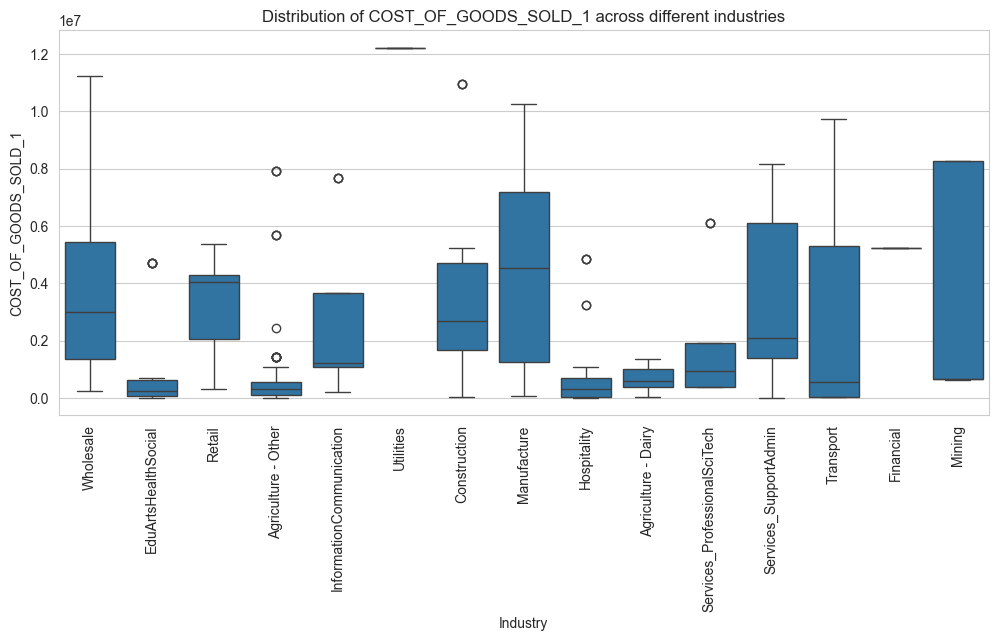

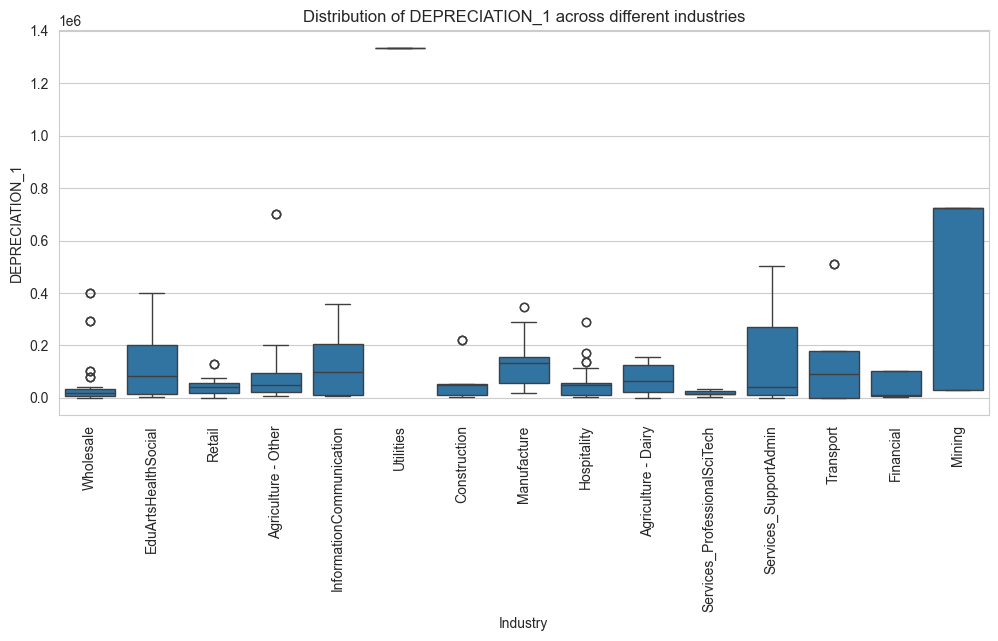

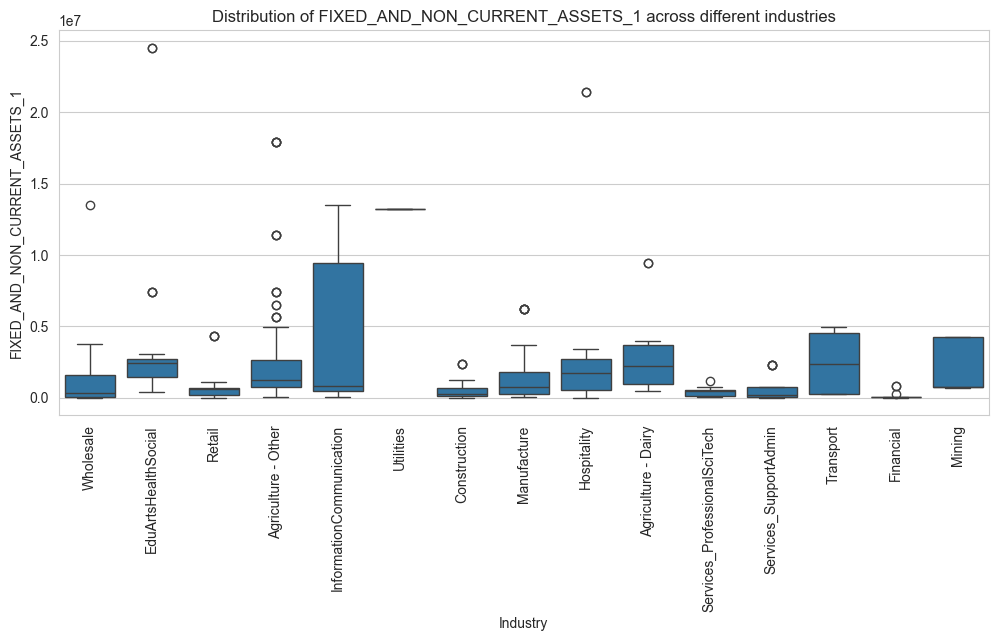

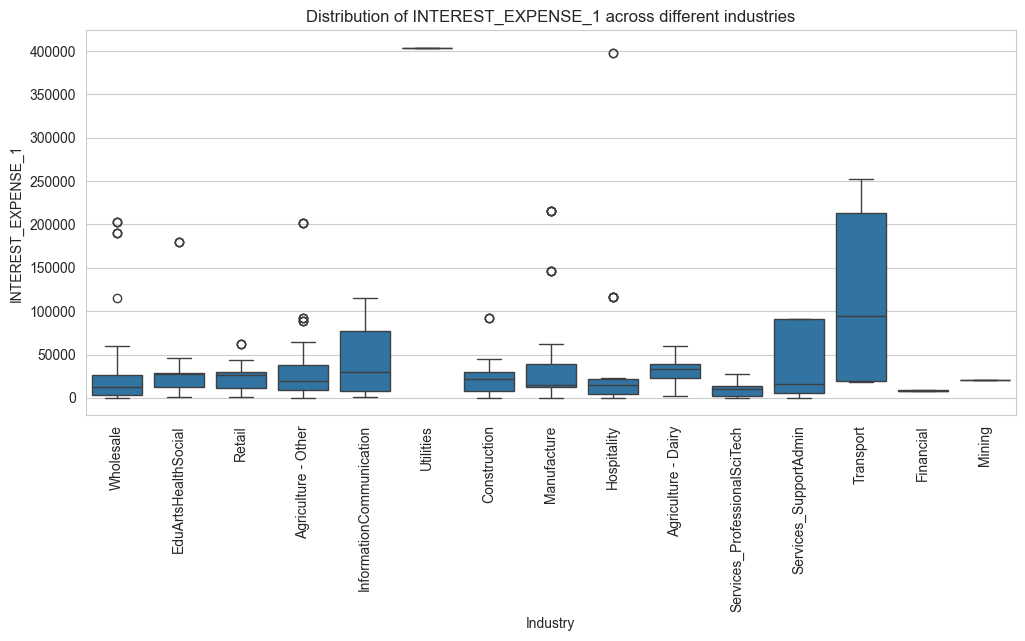

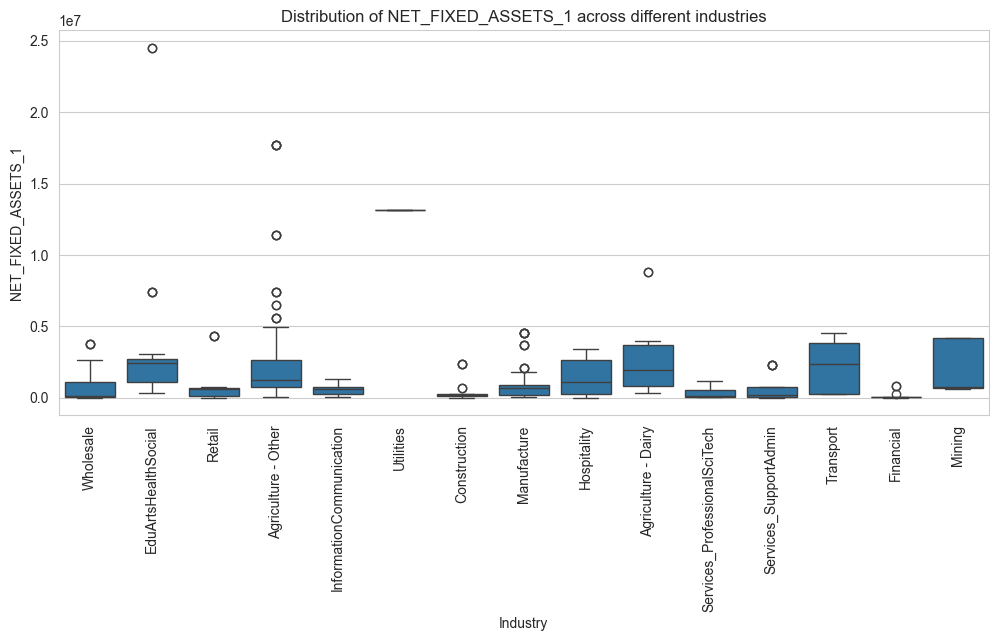

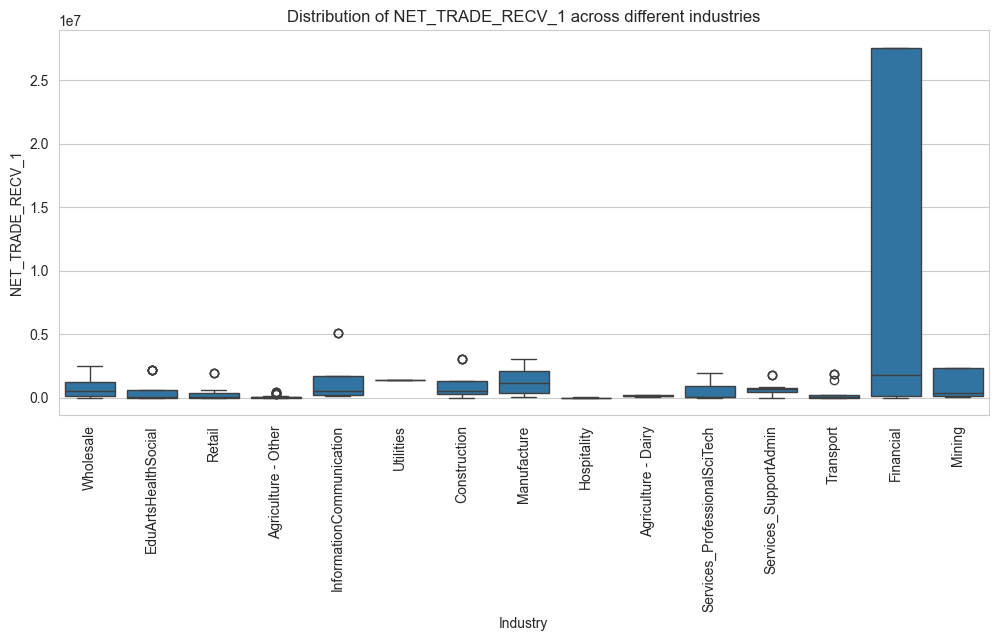

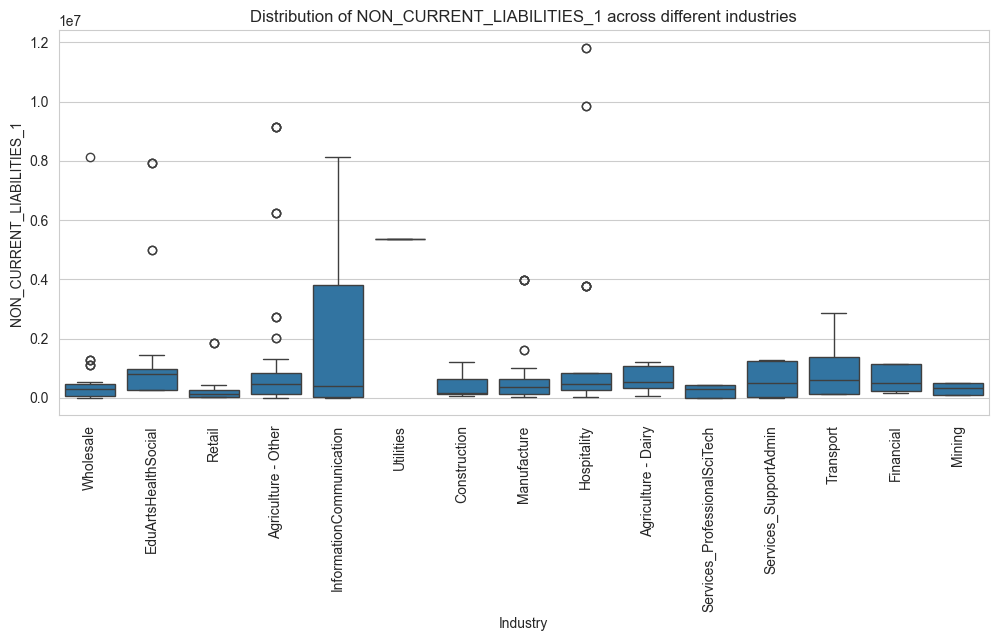

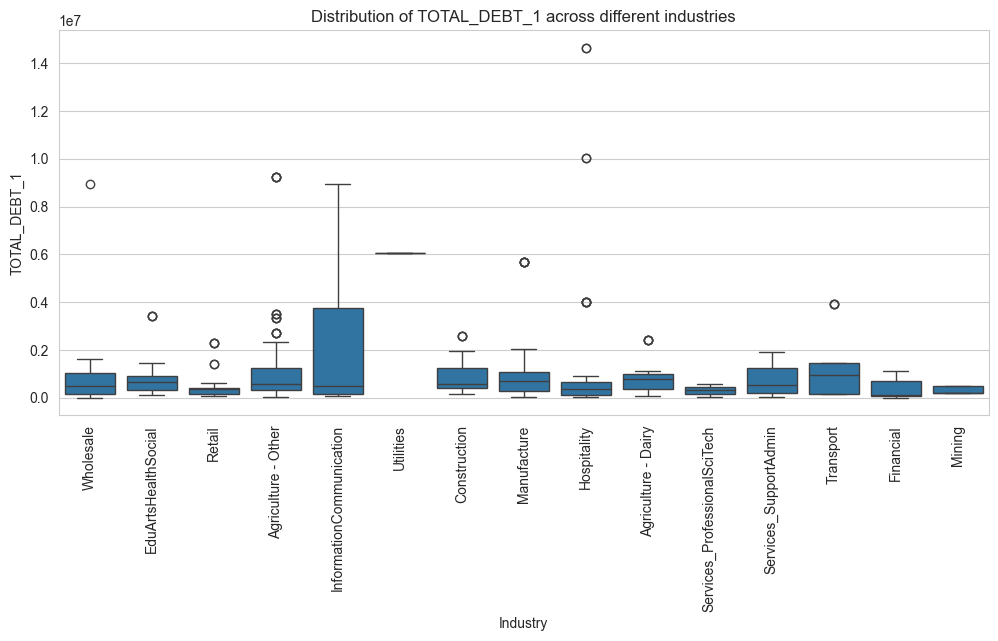

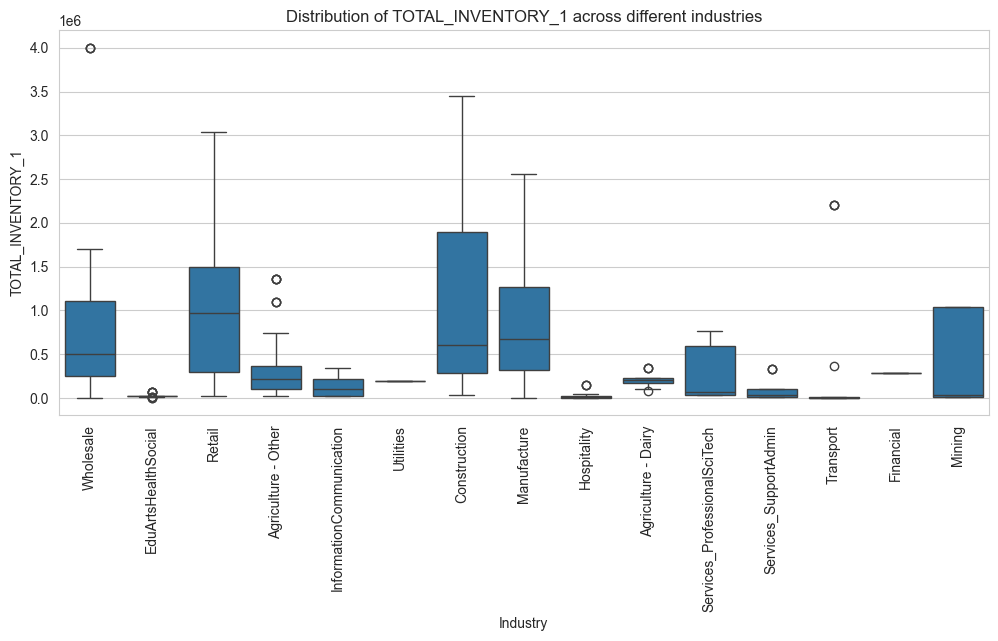

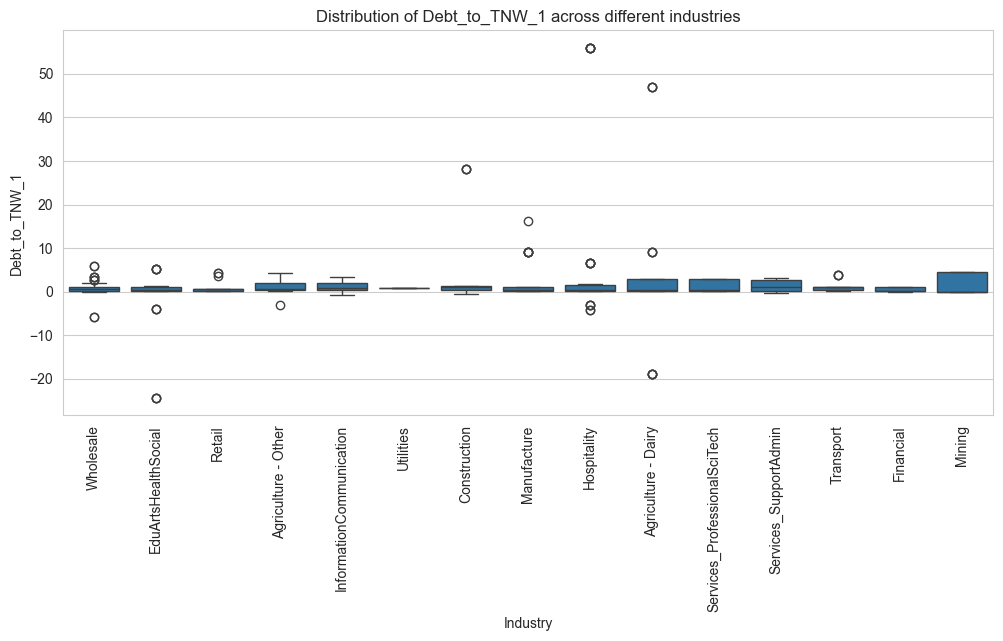

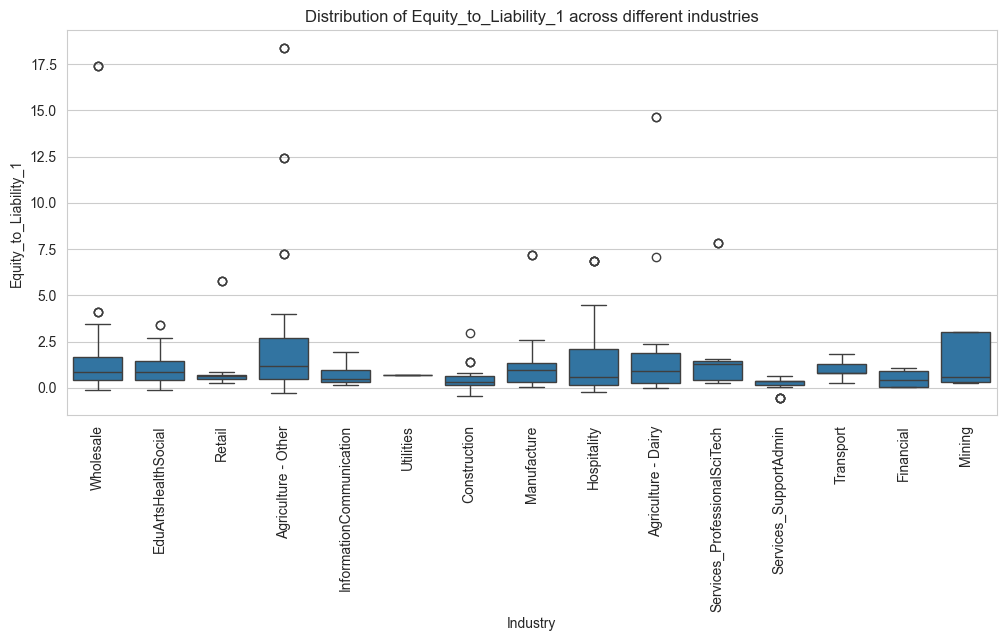

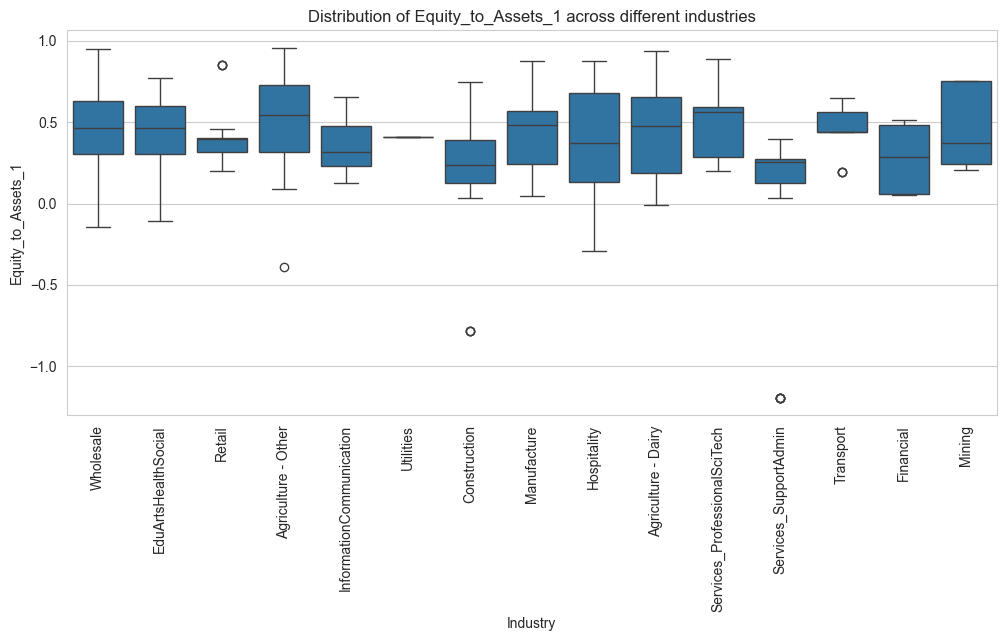

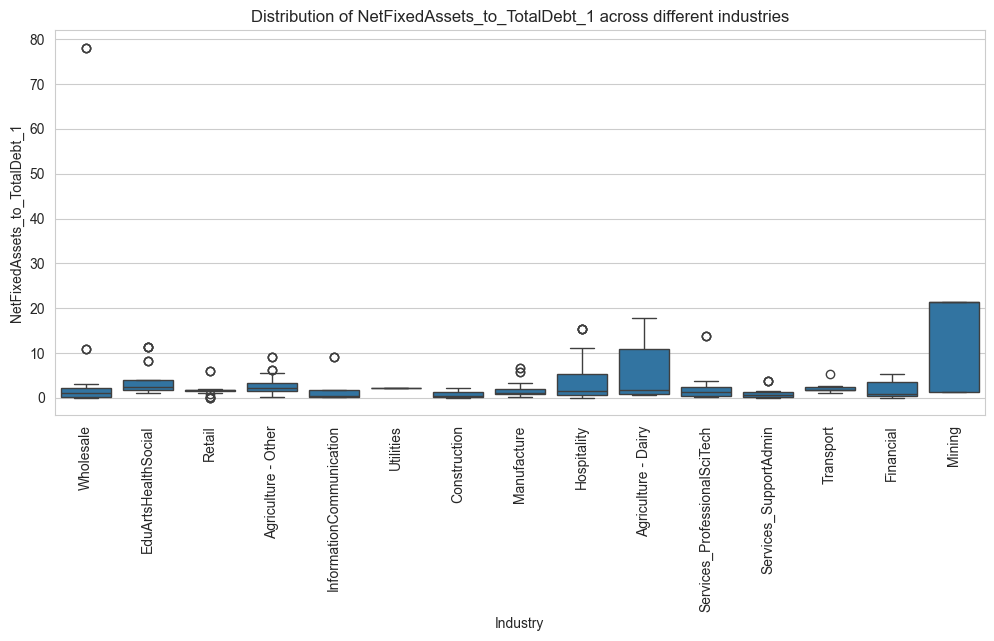

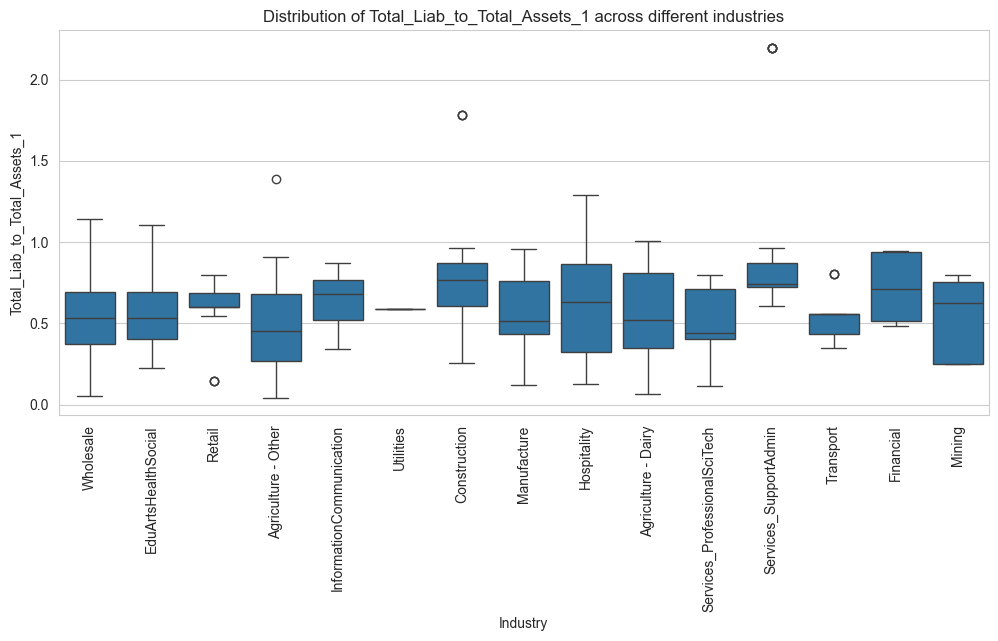

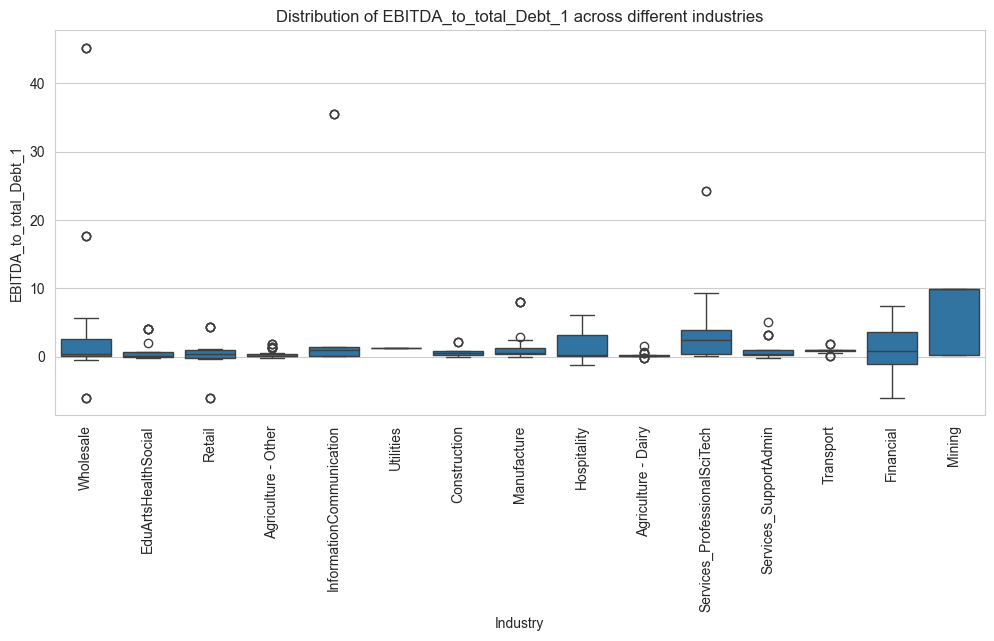

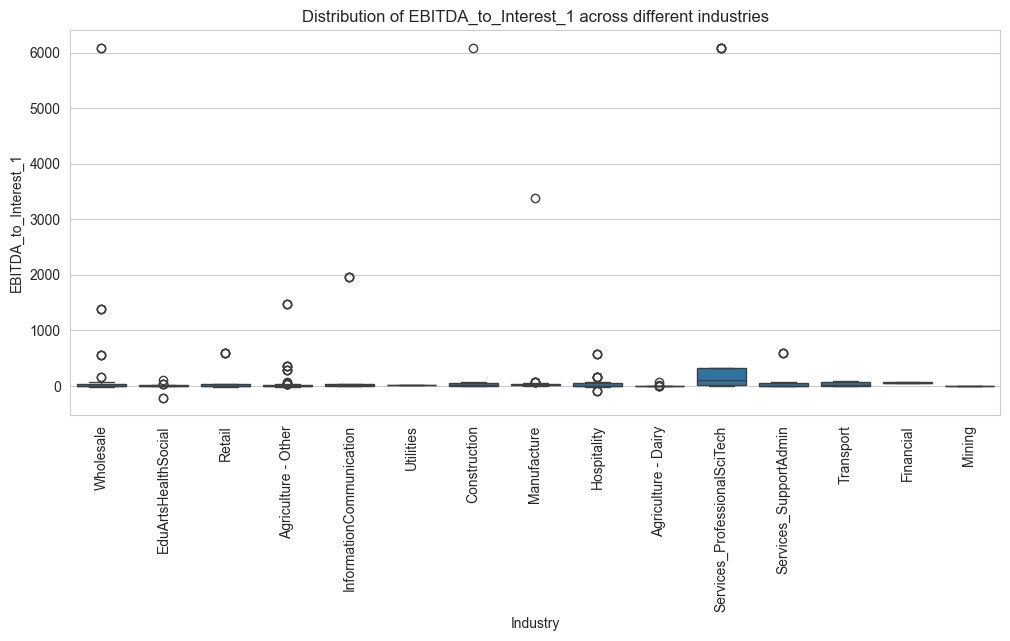

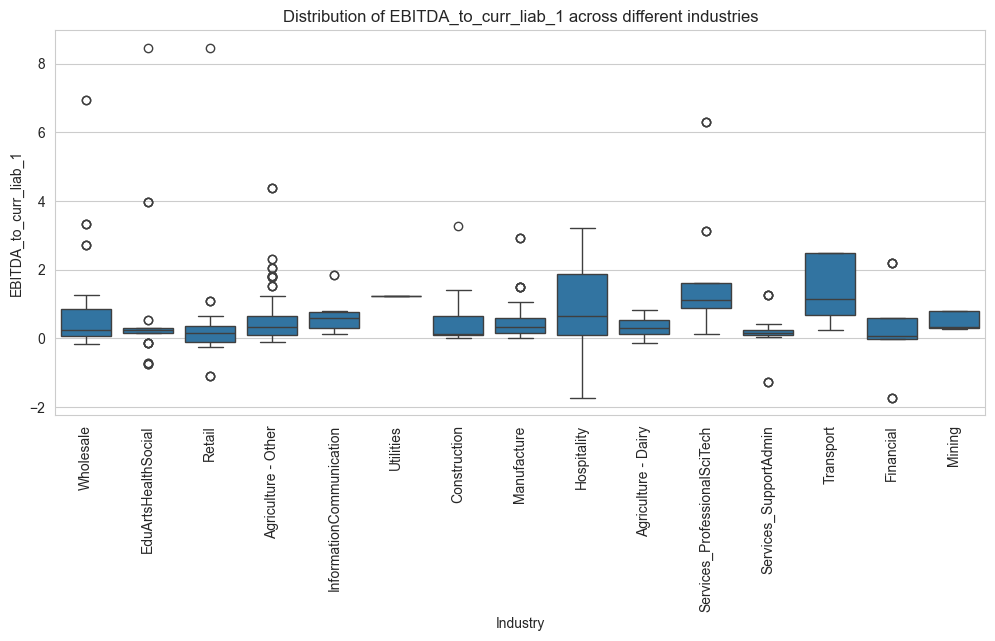

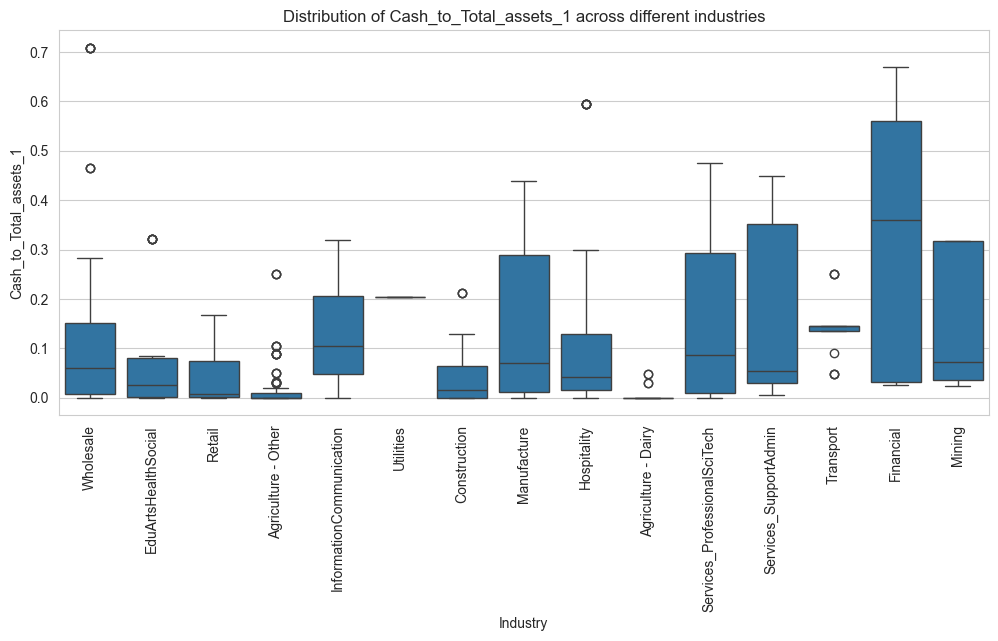

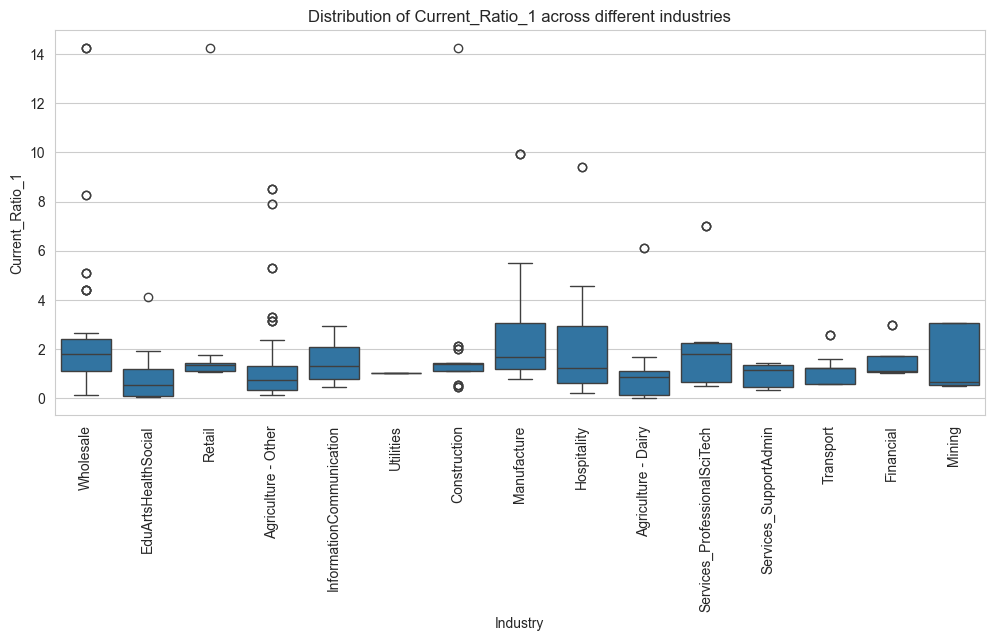

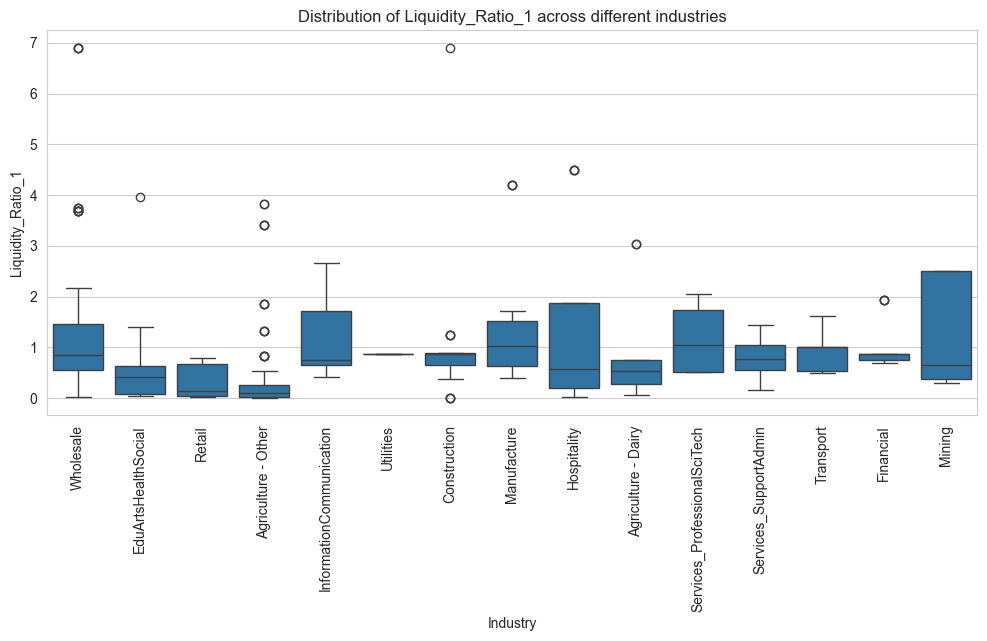

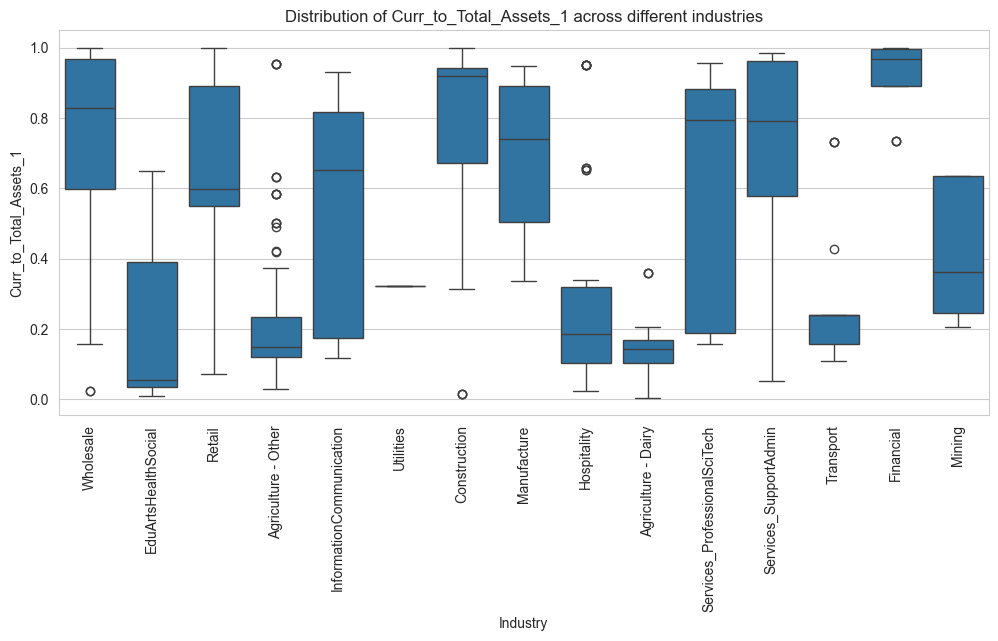

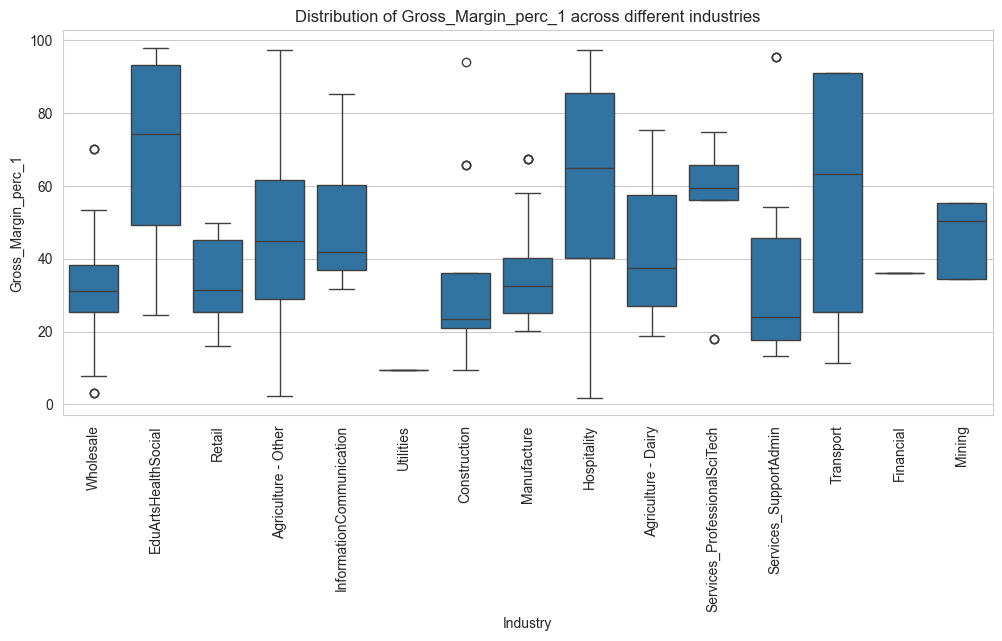

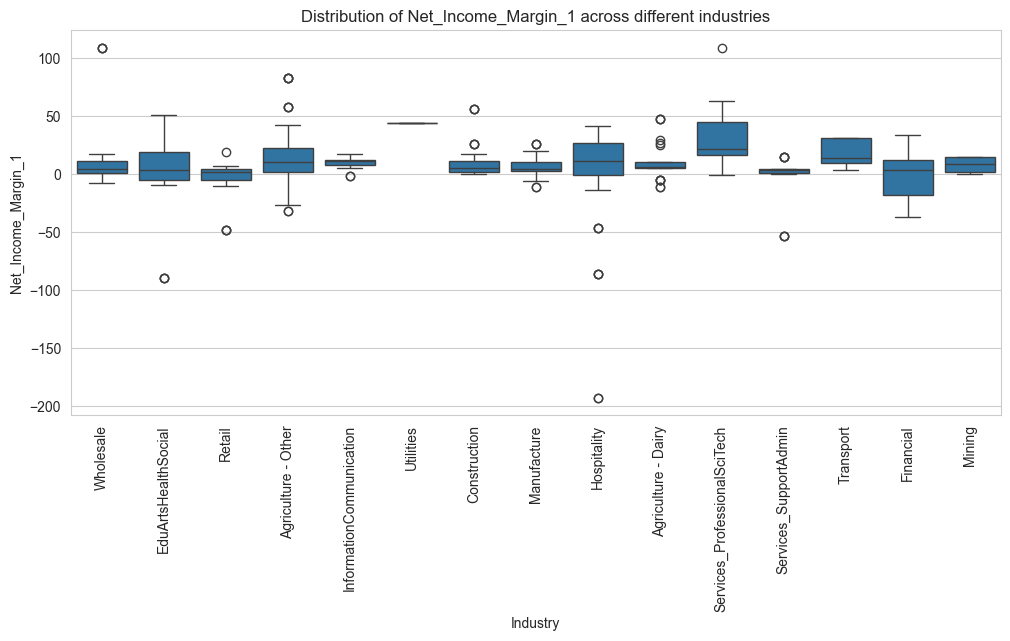

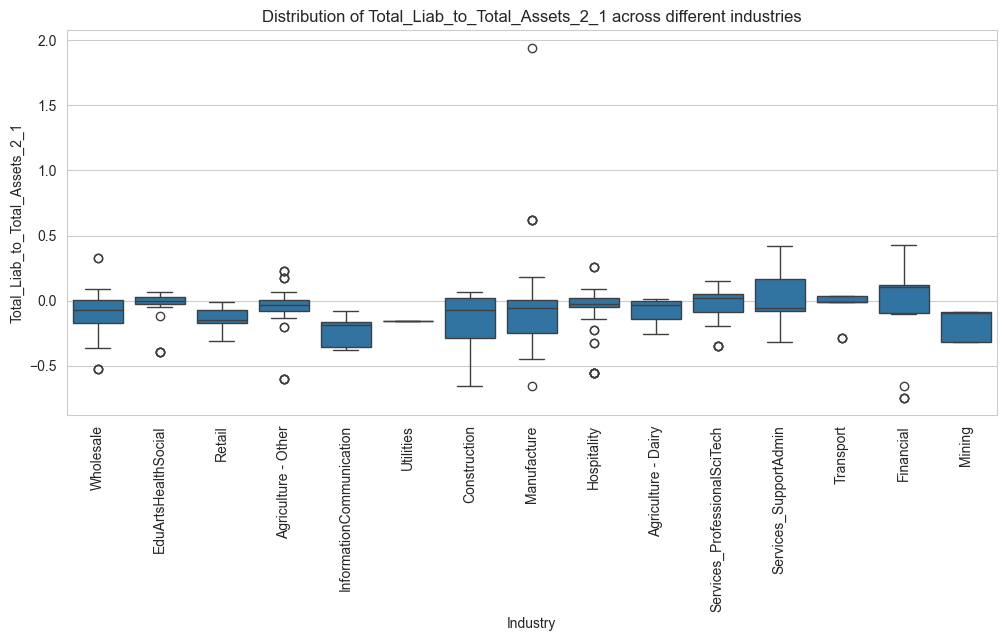

In [38]:
numerical_features = data.select_dtypes(['float64']).columns
for feature in numerical_features:
    plt.figure(figsize=(12,5))
    sns.boxplot(y=data[feature],x=data['Industry'])
    plt.xticks(rotation=90)
    plt.title(f'Distribution of {feature} across different industries')
    plt.savefig(f'graph/Distribution of {feature} across different industries')

In [39]:
#missing value imputation with median
for feature in numerical_features:
    data[feature].fillna(data.groupby('Industry')[feature].transform('median'),inplace=True)

In [40]:
data.isna().any().any()

False

In [42]:
#outlier treatment
data = data.groupby(data["Industry"].values).transform(lambda x: np.clip(x,x.quantile(0.05),x.quantile(0.95))if x.name in numerical_features else x)
data.head()

,Industry,CASH_AND_CASH_EQUIVALENTS_floored1,COST_OF_GOODS_SOLD_1,CURRENT_ASSETS_1,CURRENT_LIABILITIES_1,DEPRECIATION_1,EBITDA_1,FIXED_AND_NON_CURRENT_ASSETS_1,GROSS_PROFIT_1,INTEREST_EXPENSE_1,NET_FIXED_ASSETS_1,NET_INCOME_1,NET_INTANGIBLES_1,NET_TRADE_RECV_1,NON_CURRENT_LIABILITIES_1,RETAINED_EARNINGS_1,TOTAL_ASSETS_1,TOTAL_DEBT_1,TOTAL_INVENTORY_1,TURNOVER_1,WORKING_CAPITAL_1,Debt_to_TNW_1,Equity_to_Liability_1,Equity_to_Assets_1,NetFixedAssets_to_TotalDebt_1,Total_Liab_to_Total_Assets_1,EBITDA_to_total_Debt_1,EBITDA_to_Interest_1,EBITDA_to_curr_liab_1,Cash_to_Total_assets_1,Current_Ratio_1,Liquidity_Ratio_1,Curr_to_Total_Assets_1,Gross_Margin_perc_1,Net_Income_Margin_1,Total_Liab_to_Total_Assets_2_1,Default
0,Wholesale,323773,2995379.0,476381,516192,78247.0,357842,1953656.0,2527734,59291.0,1953654.0,150315,1,121478.0,1101146.0,812561,2430037,1360855.0,500697.0,2527734,-39811,1.6745,0.5025,0.3344,1.4356,0.6656,0.2630,6.0353,0.6932,0.1332,0.9229,0.8626,0.1960,31.23095,5.9466,-0.0501,0
1,EduArtsHealthSocial,18593,11753.0,21913,257405,6988.0,42274,668688.0,124057,6456.0,609921.0,28829,58767,84294.0,798854.0,433195,690600,255496.0,21051.0,135810,-235493,0.6824,1.6829,0.6273,2.3872,0.3727,0.1655,6.5479,0.1642,0.0269,0.0851,0.4109,0.0317,91.34570,21.2275,-0.0472,0
2,Retail,202720,3420276.0,665190,373352,76899.0,406223,542187.0,1577802,11742.0,520062.0,272950,22124,71143.0,282894.0,551127,1207376,337678.0,318856.0,4998079,291837,0.6383,0.8398,0.4565,1.5401,0.5435,1.2030,34.5947,1.0880,0.1679,1.7817,0.7335,0.5509,31.56820,5.4611,-0.3119,1
3,Agriculture - Other,87515,2349333.7,1820195,2153519,134105.0,675750,7409750.0,3242324,88218.0,7409681.0,-115120,0,328534.0,5889711.9,837370,9229945,3508001.0,539592.0,11147635,-333324,4.2087,0.1244,0.1106,2.1024,0.8894,0.1917,7.6600,0.3138,0.0095,0.8452,0.2709,0.1972,29.08530,-1.0327,-0.0209,0
4,EduArtsHealthSocial,272938,237933.0,381958,681622,81766.0,-515748,7395426.0,540762,179654.0,7395426.0,-695403,0,84294.0,7937407.0,-855472,7777384,3418577.0,21051.0,778696,-299664,-4.0618,-0.0976,-0.1082,2.1633,1.1082,-0.1509,-2.8708,-0.7566,0.0351,0.5604,0.5241,0.0491,69.44460,-89.3035,-0.0241,0


Default                                0          1
Industry                                           
InformationCommunication       68.421053  31.578947
Agriculture - Dairy            72.000000  28.000000
Construction                   79.310345  20.689655
Agriculture - Other            81.300813  18.699187
EduArtsHealthSocial            82.926829  17.073171
Retail                         89.285714  10.714286
Hospitality                    94.000000   6.000000
Financial                      95.454545   4.545455
Manufacture                    95.774648   4.225352
Wholesale                      96.153846   3.846154
Mining                        100.000000   0.000000
Services_ProfessionalSciTech  100.000000   0.000000
Services_SupportAdmin         100.000000   0.000000
Transport                     100.000000   0.000000
Utilities                     100.000000   0.000000


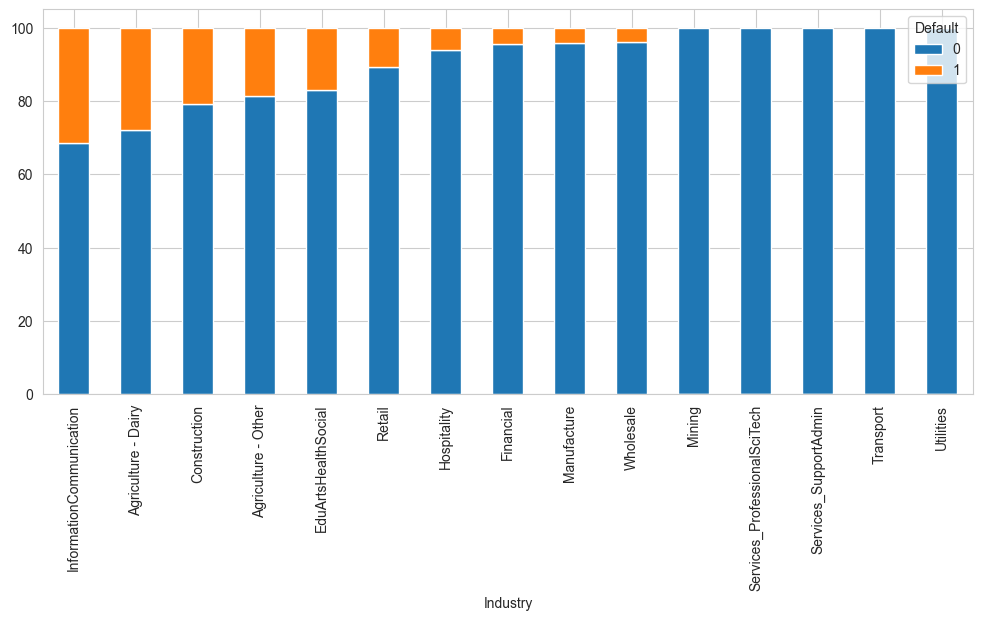

In [45]:
prop_by_industry = pd.crosstab(data['Industry'],data['Default']).apply(lambda x:x/x.sum()*100,axis=1)
prop_by_industry = prop_by_industry.sort_values(by=prop_by_industry.columns[1], ascending=False)
print(prop_by_industry)
prop_by_industry.plot(kind='bar',stacked=True)
plt.xticks(rotation=90)
plt.savefig("graph/prop_by_industry.png")

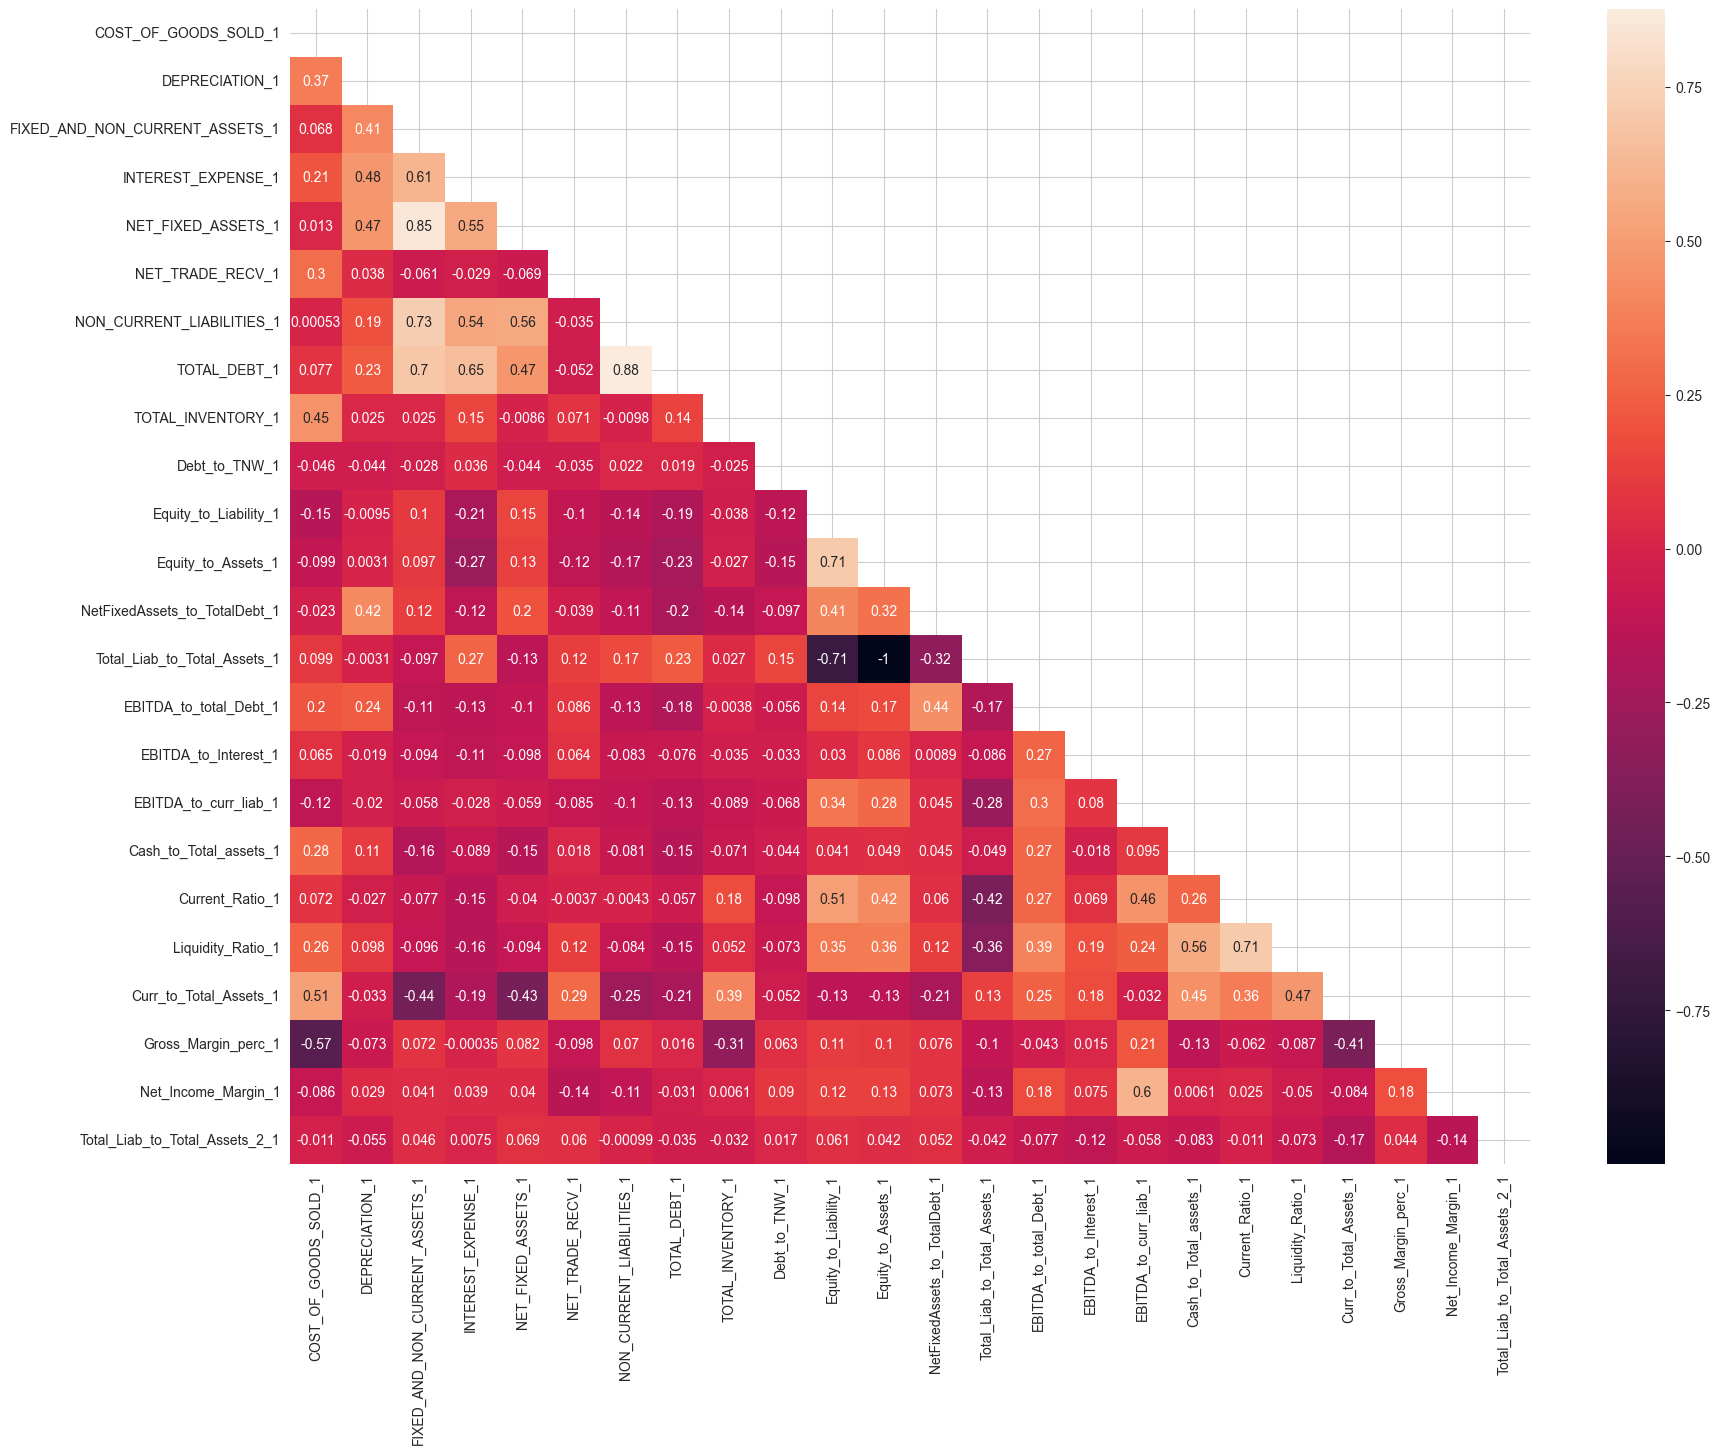

In [49]:
plt.figure(figsize=(20,15))
correlation_matrix = data[numerical_features].corr()

# Create a mask to hide the lower triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

sns.heatmap(correlation_matrix, annot=True, mask=mask)
plt.savefig("graph/correlations.png")